In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns 
%matplotlib inline
import warnings
from matplotlib.ticker import PercentFormatter
from pandas_ods_reader import read_ods
warnings.filterwarnings('ignore')


In [62]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [64]:
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

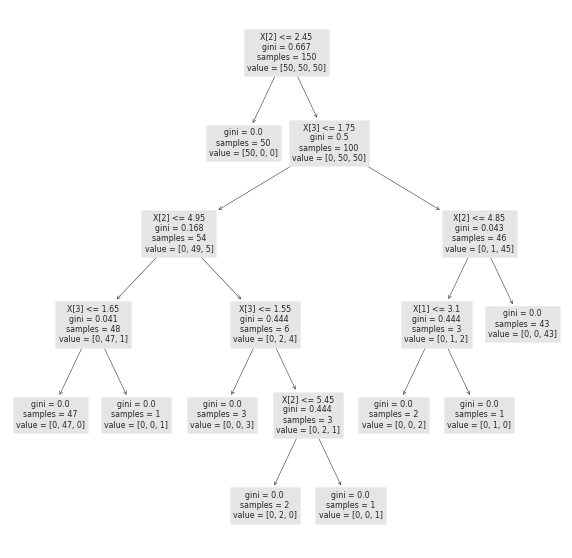

In [66]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf);

In [ ]:


Veprouvette =[49.61,49.55,50.91,50.87,48.03,50.29,48.58,48.06,50.06,50.72,48.95,49.4,49.21,49.31,49.78,48.77]
plt.figure(figsize=(12,10))
plt.hist(Veprouvette,bins=20,range=(45,55),align="mid",rwidth=0.9,color="b",edgecolor="red",label="éprouvette")
plt.title("Volume d'eau contenu par une éprouvette graduée pour 50mL mesuré")
plt.xlabel("Volume (mL)")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

In [10]:
#Data session d'hiver: 
df_s1= pd.read_excel("etudfinal1.xlsx")
#df_s1.head(5)
#Data session d'été 
path = "./etudfinal.ods"
df_s2 = read_ods(path)
#df_s2.head(5)
#Extraction des colones sexes pour chaque session 
sex_sum= df_s2["Sexe"]
sex_wint= df_s1["Sexe"]
#Creation des colonnes sex issuent des deux dataset  
sex_sum = sex_sum.to_frame()
sex_wint = sex_wint.to_frame()
sex_sum.rename(columns={"Sexe":"Sex_sumer"},inplace=True)
sex_wint.rename(columns={"Sexe":"Sex_winter"},inplace=True)
#reduire au même nombre d'échantillon: len(session été) = len(session hiver)
sx_sum_new = sex_sum[["Sex_sumer"]].sample(245).reset_index()
#new dataset avec un nombre d'échantillon égal pour les deux saisons 
df_sex= pd.concat([sx_sum_new,sex_wint],axis=1) 

In [60]:
df_sex.drop(["index"])

KeyError: "['index'] not found in axis"

In [11]:
#Calcul des pourcentages hommes & femmes 
Sumer_percent = df_sex["Sex_sumer"].value_counts()*100 /len(df_sex)
Winter_percent = df_sex["Sex_winter"].value_counts()* 100/len(df_sex)

In [13]:
Winter_percent 

Femme           73.469388
Homme           25.306122
Femme, Homme     1.224490
Name: Sex_winter, dtype: float64

In [14]:
df_prcent = pd.concat([Sumer_percent,Winter_percent],axis=1) 

In [15]:
df_prcent.fillna(0)

,Sex_sumer,Sex_winter
Femme,71.836735,73.469388
Homme,28.163265,25.306122
"Femme, Homme",0.000000,1.224490


In [58]:
df_prcent

,Sex_sumer,Sex_winter,sexe
Femme,71.836735,73.469388,femme
Homme,28.163265,25.306122,homme
"Femme, Homme",0.000000,1.224490,il_elle


<BarContainer object of 3 artists>

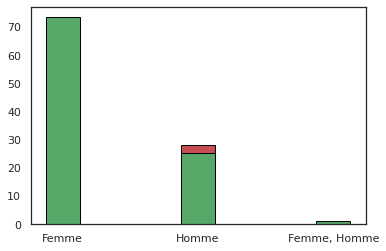

In [29]:

sns.barplot(data=df_prcent, df_prcent['Sex_sumer'], color = 'r',
        width = var, edgecolor = 'black', label='Summer')


In [ ]:

sns.barplo( df_prcent.index, df_prcent['Sex_winter'],color = 'g',
            width = var, edgecolor = 'black', label='Winter')
  

AttributeError: 'Rectangle' object has no property 'colors'

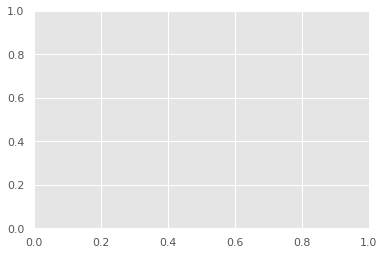

In [57]:
#style.use("ggplot")
sns.histplot(df_prcent, bins=5, colors= ['blue','red'],rwidth=0.5, label=['men','women']);

TypeError: Neither the `x` nor `y` variable appears to be numeric.

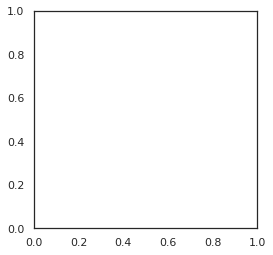

In [20]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(4,4))
sns.barplot(x=df_prcent.index, y=["Sex_sumer","Sex_winter"],ax=ax1,
            color='r', marker="o")
plt.show();

In [36]:
df_sex

,index,Sex_sumer,Sex_winter
0,88,Femme,Femme
1,393,Femme,Homme
2,1068,Femme,Homme
3,4,Femme,Homme
4,1158,Homme,Femme
...,...,...,...
240,706,Homme,Homme
241,39,Homme,Homme
242,1084,Femme,Homme
243,349,Femme,Homme


In [42]:
df_prcent["sexe"]=["femme","homme","il_elle"]

In [43]:
df_prcent.fillna(0,inplace= True)

In [44]:
df_prcent

,Sex_sumer,Sex_winter,sexe
Femme,71.836735,73.469388,femme
Homme,28.163265,25.306122,homme
"Femme, Homme",0.000000,1.224490,il_elle


In [53]:
df_new=pd.concat([Sumer_percent,Winter_percent],axis=0)

In [56]:
df_new=df_new.to_frame()


In [48]:
df_prcent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Femme to Femme, Homme
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex_sumer   3 non-null      float64
 1   Sex_winter  3 non-null      float64
 2   sexe        3 non-null      object 
dtypes: float64(2), object(1)
memory usage: 96.0+ bytes


In [ ]:
df_prcent

<AxesSubplot:xlabel='sexe', ylabel='Sex_winter'>

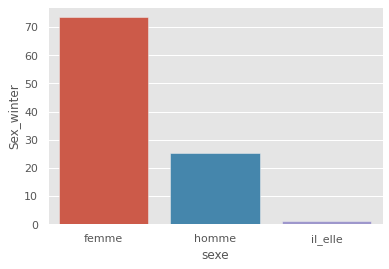

In [51]:
sns.barplot(data=df_prcent, x="sexe", y="Sex_winter")

In [21]:
df = sns.load_dataset("penguins")

In [22]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Example with confusion matrix 



This article was published as a part of the Data Science Blogathon

Introduction
Confusion Matrix for multiclass classification is used to know the performance of a Machine learning classification. It is represented in a matrix form.

Confusion Matrix gives a comparison between Actual and predicted values.

The confusion matrix is a N x N matrix, where N is the number of classes or outputs.

For 2 class ,we get 2 x 2 confusion matrix.

For 3 class ,we get 3 X 3 confusion matrix.

Loading Image
100% Job Guarantee
Get a curriculum curated by industry - experts and become a Data Scientist within 8 months
Confusion Matrix has 4 terms to understand True Positive(TP),False Positive(FP),True Negative(TN) and False Negative(FN).

How does the confusion matrix look like?
Below is the representation of the confusion matrix.

confusion matrix| how it looks
Confusion matrix for Binary Classification
Let us understand the confusion matrix for a simple binary classification example.

Binary classification has 2 outputs, the inputs for this classification will fall in either of the 2 outputs or classes.

Example: Based on certain inputs we have to decide whether the person is sick or not, diabetic or not.

Let us see how to construct a confusion matrix and understand its terminologies. Consider we have to model a classifier that classifies 2 kinds of fruits.

We have 2 types of fruits Apples and grapes and we want our machine learning model to identify or classify the given fruit as an Apple or grapes.

So we take 15 samples of 2 fruits, out of which 8 belong to Apples and 7 belong to the grapes class. (Class is nothing but the output, in this example, we have 2 output classes apple and grapes). We will represent Apple as 1 and grape as 0 class.

The actual class for 8 apples and 7 grapes,can be represented as

Actual = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]

The classifier model to predict 1 for Apple and 0 for grape.

Assume that the classifier takes all the 15 inputs and, makes the following predictions:

· Out of 8 apples, it will classify 5 correctly as Apple and wrongly predict 3 as grapes.

· Out of 7 grapes, it will classify 5 correctly as grapes and wrongly predicts 2 as an apple.

The prediction of the classifier may be as:

Prediction = [1,0,0,0,1,1,1,1,0,0,0,0,0,1,1]


The confusion matrix for this example can be visualized as below.

confusion matrix | binary classification
For our example the positive value is Apple and the negative value is Grapes.

True Positive:
It means the actual value and also the predicted values are the same.

In our case the actual value is also apple and the model prediction is also apple.

If you observe for the TP cell the positive value is the same for Actual and predicted.

False Negative:
This means the actual value is positive in our case it is apple but the model has predicted it as negative i.e., grapes. So the model has given the wrong prediction, It was supposed to give a positive(apple) but it has given a negative(grape) so whatever the negative output we got is false, hence the name False Negative.

False Positive:
This means the actual value is negative in our case it is grapes but the model has predicted it as positive i.e., apple. So the model has given the wrong prediction, it was supposed to give negative(grape) but it has given positive(apple) so whatever the positive output we got is false, hence the name False Positive.

True Negative:
It means the actual value and also the predicted values are the same. In our case, the actual values are also grapes and the Prediction is also Grapes.

The values for the above example are:

TP=5, FN=3, FP=2, TN=5.

Confusion matrix for Multi-class classification.
The above example is a binary classification with only 2 outputs so we got a 2 X 2 matrix.

So what if the outputs are greater than 2 classes i.e., Multi-class classification.

How to calculate TP, FN, FP, TN?

Confusion matrix for a 3 class classification:
Let’s try to understand confusion matrix for 3 classes and confusion matrix for multiple classes with a popular dataset – IRIS DATASET.

The dataset has 3 flowers as outputs or classes, Versicolor, Virginia, Setosa.

 

iris dataset
Source: Google

With the help of petal length, petal width, sepal length, sepal width the model has to classify the given instance as Versicolor or Virginia or Setosa flower.

Let’s apply a classifier model here decision Tree classifier is applied on the above dataset. The dataset has 3 classes hence we get a 3 X 3 confusion matrix.

But how to know TP, TN, FP, FN values !!!!!

In the multi-class classification problem, we won’t get TP, TN, FP, FN values directly as in the binary classification problem. We need to calculate for each class.

#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importing of dataset to dataframe. 
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")
#To see first 5 rows of the dataset
df.head()
#To know the data types of the variables.
df.dtypes
#Speceis is the output class,to know the count of each class we use value_counts()
df['Species'].value_counts()
#Separating independant variable and dependent variable("Species")
X = df.drop(['Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()